In [1]:
def get_results_for_p(p,all_results):
    # Create the key as a tuple
    #key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.k_entry,p.k_f,p.prod_alpha,p.dt)
    key = (p.num_z,p.num_v,p.num_n,p.n_bar,p.num_q,p.q_0,p.prod_q,p.hire_c,p.prod_alpha,p.dt,p.u_bf_m)
    # Check if the key exists in the saved results
    if key in all_results:
        print(key)
        return all_results[key]
    else:
        print(f"No results found for p = {key}")
        return None

from primitives import Parameters
p = Parameters()
import pickle
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots
import cProfile
import pstats

plts=Plots(p)
cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc,mwc_J,mwc_W,mwc_Wstar,mwc_pc,mwc_n1,mwc_s_J,mwc_s_W,mwc_s_Wstar,mwc_s_sep,mwc_sd_J,mwc_sd_W,mwc_sd_Wstar,mwc_sd_sep=None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None

In [3]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

with open("results_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
results_GE = get_results_for_p(p,all_results)

with open("model_GE.pkl", "rb") as file:
    all_results = pickle.load(file)
model = get_results_for_p(p,all_results)

No results found for p = (3, 100, 6, 5, 6, 0.5, 0.5, 20.0, 0.85, 1.0, 1.0)
No results found for p = (3, 100, 6, 5, 6, 0.5, 0.5, 20.0, 0.85, 1.0, 1.0)
No results found for p = (3, 100, 6, 5, 6, 0.5, 0.5, 20.0, 0.85, 1.0, 1.0)


In [5]:
from Multiworker_Contract_GE_JITted import MultiworkerContract
mwc_GE=MultiworkerContract(p)

ValueError: No threading layer could be loaded.
HINT:
Intel TBB is required, try:
$ conda/pip install tbb

In [5]:
# GE basic
if results_GE is not None:
    #mwc_GE_J = np.repeat(results_GE['J'], 6, axis=-1)

    mwc_GE_J =results_GE['J']   
    #mwc_GE_W = np.repeat(results_GE['W'], 6, axis=-2)
    mwc_GE_W =results_GE['W']   
    mwc_GE_U = results_GE['U']
    #mwc_GE_Rho = np.repeat(results_GE['Rho'], 6, axis=-1)
    mwc_GE_Rho =results_GE['Rho']   
    mwc_GE_P = results_GE['P']
    mwc_GE_kappa = results_GE['kappa']
    mwc_GE_sep_star = model.sep_star
    mwc_GE_n0_star = model.n0_star


model=mwc_GE.J_sep(update_eq=0,s=20.0)
#model=mwc_GE.J_sep(mwc_GE_J,mwc_GE_W,mwc_GE_U,mwc_GE_Rho,mwc_GE_P,mwc_GE_kappa,mwc_GE_n0_star,mwc_GE_sep_star,update_eq=1,s=20.0)

J shape (3, 6, 11, 100, 6)
W shape (3, 6, 11, 100, 6, 2)
Slow kappa method
kappa 29.17972788006656
P [ 0.56409814  0.5621181   0.55945736  0.55585566  0.55093149  0.54410652
  0.53446436  0.52046454  0.49930026  0.46523889  0.40436907  0.27161699
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -

c:\Users\zaloilo\Documents\GitHub\Dynamic-Contracting-Multi-worker-Firm\VFI\2 Steps\primitives.py:187: RuntimeWarning: invalid value encountered in power
  return np.power( np.power(self.p.alpha/q,self.p.sigma) - np.power(self.p.alpha,self.p.sigma), 1 / self.p.sigma )


: 

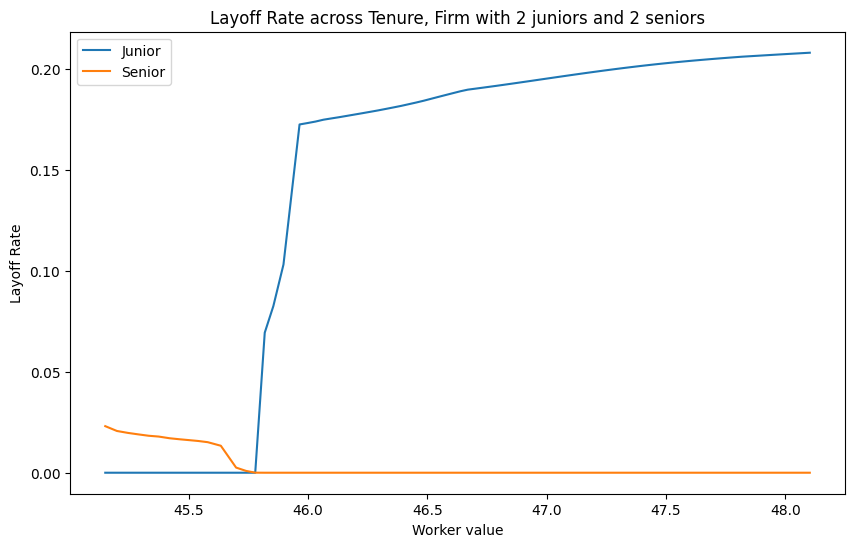

In [26]:
prod = p.z_0-2
j=2
s=2
minv= 0
q = 0

#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.Vf_J[prod,j,s,:,q])
#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.Jp[prod,j,s,:,q])
#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.EW_star[prod,j,s,:,q])

#plt.plot(model.Vf_W[prod,j,s,:,q,1],model.n0_star[prod,j,s,:,q])
plt.figure(figsize=(10, 6))  # Width=16 inches, Height=6 inches
plt.plot(model.Vf_W[prod,j,s,:,q,1],model.sep_star[prod,j,s,:,q], label= 'Junior') #Okay separations are trash. More separations at higher productivity. Found this at j1,s2,q0
plt.plot(model.Vf_W[prod,j,s,:,q,1],model.sep_star1[prod,j,s,:,q], label='Senior')
plt.title(f'Layoff Rate across Tenure, Firm with 2 juniors and 2 seniors')
plt.xlabel('Worker value')
plt.ylabel('Layoff Rate')
plt.legend()
plt.show()

In [17]:
(model.n0_star[p.z_0-2,...] - model.n0_star[p.z_0-1,...]).sum()

-2980.265039569216

In [9]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(0)

57.87362071907278


Jshape (3, 6, 6, 100, 6)
W shape (3, 6, 6, 100, 6, 2)
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004663009825420811
Time to fit the spline 0.028362751007080078
Errors: 1.1711673791537682 0.0027521406719712 1
EJinv -186.3572317894212
EJderiv 30.26513032604987
EJinv diff 1j 2s: 32.311212362852324
EJinv diff 1 sen: 9.027754994751035
EJinv diff 2 sen: 16.445652919615625


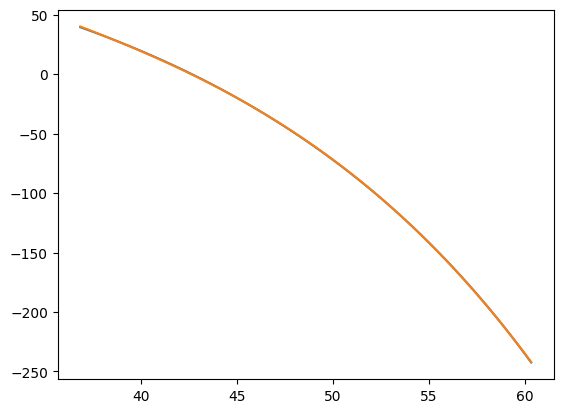

q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004623684339633944
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004597067292232343
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004915950397624182
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.005000268544624004
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004972654270597881
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004798869933668234
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004285778233193002
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004444084939547433
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
Diff Rho: 0.004898775275370288
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rh

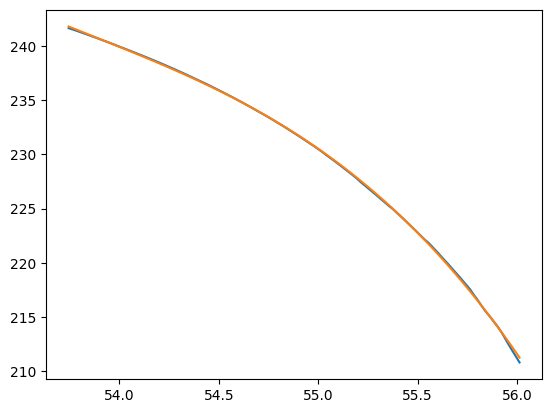

sep borders 0.0 1.0
q_star [0.93109338 0.93383296 0.93673823 0.93985852 0.94326487 0.94706357]
n0_star borders 0.0 5.0
Diff Rho: 0.0005012662878973794
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005015844575672146
sep borders 0.0 1.0
q_star [0.94311191 0.94488516 0.94665844 0.94843175 0.95020509 0.95197848]
n0_star borders 0.0 5.0
Diff Rho: 0.0005072653328130244
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0004976186593717897
sep borders 0.0 1.0
q_star [0.98990626 0.99192756 0.99394763 0.99596642 0.99798389 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.000500786470161631
sep borders 0.0 1.0
q_star [0.98984727 0.99187698 0.99390712 0.99593766 0.99796863 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005129290831853051
sep borders 0.0 1.0
q_star [0.98974172 0.99179386 0.99384575 0.99589741 0.99794883 1.        ]
n0_star bord

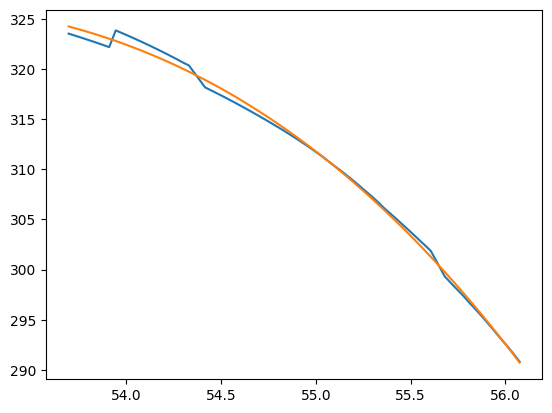

sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005414827948875242
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005580234553739439
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005961281554873696
sep borders 0.0 1.0
q_star [0.99016962 0.99213581 0.99410195 0.99606802 0.99803403 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005713834090954455
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005348051703556583
sep borders 0.0 1.0
q_star [0.96861897 0.97053359 0.9724482  0.9743628  0.97627927 0.97819385]
n0_star borders 0.0 5.0
Diff Rho: 0.0005218064545860161
sep borders 0.0 1.0
q_star [0.59990267 0.59992899 0.59995357 0.59997655 0.59999778 0.60001797]
n0_star borders 0.0 5.0

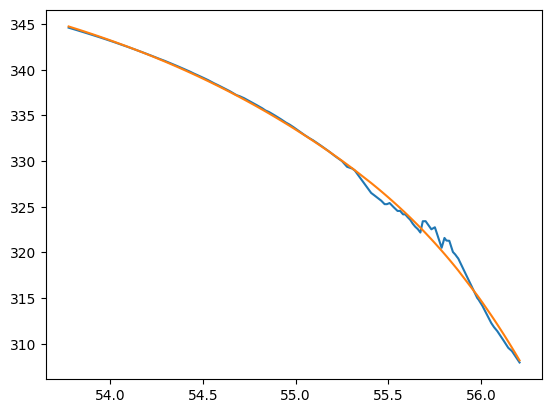

sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005019340216553731
sep borders 0.0 1.0
q_star [0.98990844 0.99192613 0.99394413 0.99596244 0.99798106 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004921161162355493
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0004893222499698666
sep borders 0.0 1.0
q_star [0.98984798 0.99187753 0.99390751 0.99593791 0.99796874 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004842613433417788
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.00046010134964244583
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0004651788589627611
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff

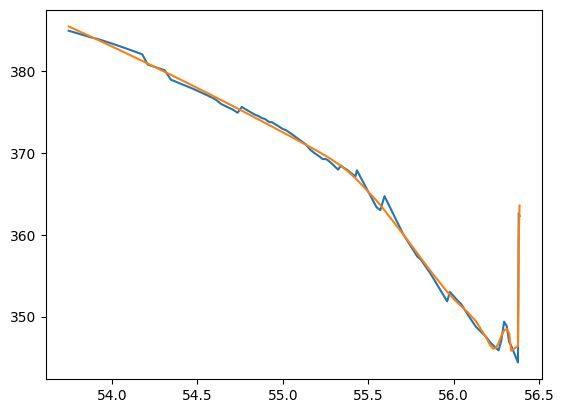

sep borders 0.0 1.0
q_star [0.5        0.6        0.7        0.8        0.99793401 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004850870671792387
sep borders 0.0 1.0
q_star [0.5        0.6        0.7        0.8        0.99799993 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004903561098394234
sep borders 0.0 1.0
q_star [0.5        0.99154923 0.7        0.8        0.98395699 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004835228141569247
sep borders 0.0 1.0
q_star [0.9496825  0.95151356 0.95334495 0.99592645 0.95701332 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.00047439793773965794
sep borders 0.0 1.0
q_star [0.5        0.5009901  0.5019802  0.87235537 0.5039604  0.87520976]
n0_star borders 0.0 5.0
Diff Rho: 0.00047316675868064784
sep borders 0.0 1.0
q_star [0.69845869 0.69917037 0.70007854 0.70110121 0.70221547 0.70350405]
n0_star borders 0.0 5.0
Diff Rho: 0.0004713569007226627
sep borders 0.0 1.0
q_star [0.70951157 0.70723792 0.70630791 0.7063198  0.70666272 0.7076798

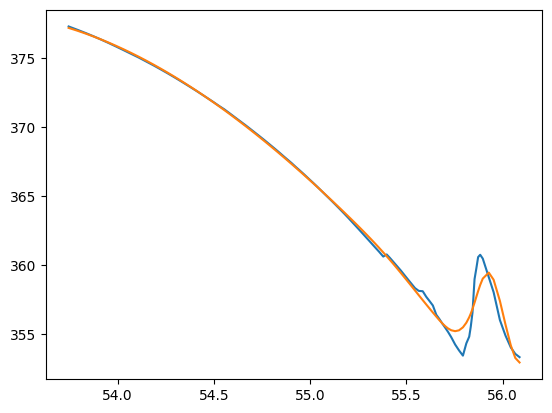

sep borders 0.0 1.0
q_star [0.78844358 0.78937723 0.78940694 0.79012186 0.78944665 0.7894671 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005297221013691627
sep borders 0.0 1.0
q_star [0.62536341 0.62666024 0.77903408 0.60257575 0.62959897 0.63018481]
n0_star borders 0.0 5.0
Diff Rho: 0.0005205297433379437
sep borders 0.0 1.0
q_star [0.58358344 0.58440442 0.7831901  0.60413633 0.58680782 0.58751302]
n0_star borders 0.0 5.0
Diff Rho: 0.0005291175915500657
sep borders 0.0 1.0
q_star [0.78276312 0.78376781 0.78484731 0.70105911 0.78717352 0.78840683]
n0_star borders 0.0 5.0
Diff Rho: 0.0005103794124070938
sep borders 0.0 1.0
q_star [0.77868315 0.78007161 0.78147799 0.7829491  0.78433236 0.78577639]
n0_star borders 0.0 5.0
Diff Rho: 0.00048213814059830753
sep borders 0.0 1.0
q_star [0.75176    0.75214804 0.7529625  0.75403204 0.75475357 0.75586472]
n0_star borders 0.0 5.0
Diff Rho: 0.0004923991527883589
sep borders 0.0 1.0
q_star [0.71021427 0.71016893 0.71048545 0.71008111 0.71006799 0.71028314

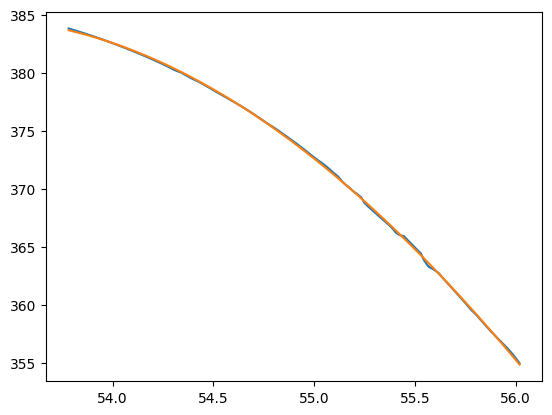

sep borders 0.0 1.0
q_star [0.59929573 0.59929759 0.59929936 0.59930103 0.59930262 0.59930434]
n0_star borders 0.0 5.0
Diff Rho: 0.0005073729502910637
sep borders 0.0 1.0
q_star [0.5973513  0.59735696 0.59736251 0.59736795 0.5973733  0.59737875]
n0_star borders 0.0 5.0
Diff Rho: 0.0005268211352562379
sep borders 0.0 1.0
q_star [0.59587434 0.59588286 0.59589126 0.59589955 0.59590772 0.59591597]
n0_star borders 0.0 5.0
Diff Rho: 0.0004902056711640728
sep borders 0.0 1.0
q_star [0.59499483 0.5950052  0.59501546 0.59502559 0.59503561 0.5948447 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0004776861694877284
sep borders 0.0 1.0
q_star [0.59153354 0.59155059 0.59109708 0.5905575  0.59033699 0.59035249]
n0_star borders 0.0 5.0
Diff Rho: 0.00047921824048377775
sep borders 0.0 1.0
q_star [0.59288178 0.59289661 0.5929113  0.59267794 0.59225464 0.59210328]
n0_star borders 0.0 5.0
Diff Rho: 0.00048301230702446293
sep borders 0.0 1.0
q_star [0.5918107  0.59182677 0.591582   0.59098959 0.59072687 0.5907077

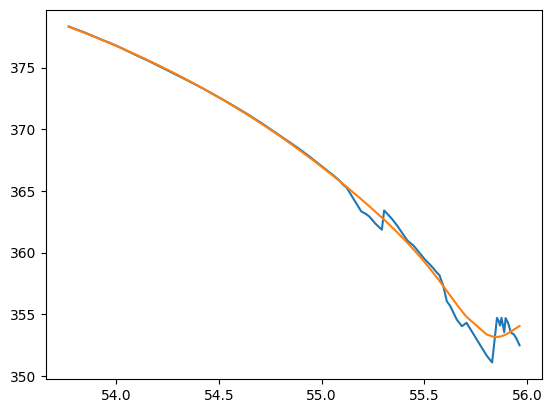

sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0006603243425460315
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0006699377928879026
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.000667596604947366
sep borders 0.0 1.0
q_star [0.60471639 0.60478812 0.60485654 0.60493049 0.60500759 0.6050821 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0006536775082724556
sep borders 0.0 1.0
q_star [0.69685697 0.69684511 0.69680645 0.69660416 0.69653972 0.69662702]
n0_star borders 0.0 5.0
Diff Rho: 0.000617127456293606
sep borders 0.0 1.0
q_star [0.68292331 0.68321306 0.68363187 0.68425962 0.68495512 0.68567631]
n0_star borders 0.0 5.0
Diff Rho: 0.000683927227677674
sep borders 0.0 1.0
q_star [0.6755487  0.67646407 0.67742199 0.67843071 0.67947759 0.68055202]
n0_star borders 0.0 

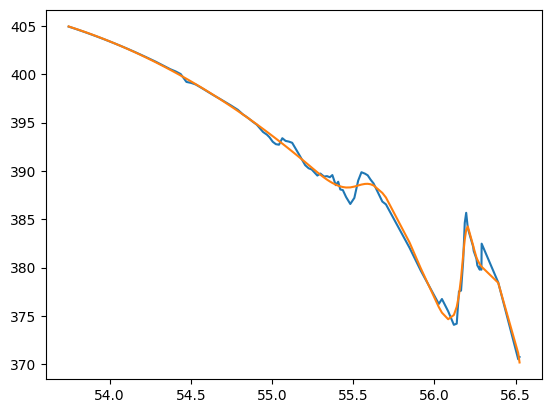

sep borders 0.0 1.0
q_star [0.7032544  0.7032549  0.7032551  0.70325521 0.70325501 0.70332006]
n0_star borders 0.0 5.0
Diff Rho: 0.0005182681232793092
sep borders 0.0 1.0
q_star [0.7000491  0.70007064 0.70009162 0.7001125  0.70013279 0.69955983]
n0_star borders 0.0 5.0
Diff Rho: 0.0005473511688222838
sep borders 0.0 1.0
q_star [0.70055909 0.70058348 0.70060723 0.70063077 0.70065366 0.70067874]
n0_star borders 0.0 5.0
Diff Rho: 0.0005023764764186806
sep borders 0.0 1.0
q_star [0.70246897 0.70248738 0.7025052  0.70252275 0.70253971 0.70260528]
n0_star borders 0.0 5.0
Diff Rho: 0.0004746797170796658
sep borders 0.0 1.0
q_star [0.70420334 0.70422035 0.70423674 0.70425281 0.70426826 0.70437191]
n0_star borders 0.0 5.0
Diff Rho: 0.0004773552707984232
sep borders 0.0 1.0
q_star [0.70546539 0.70548335 0.70550064 0.70551753 0.70553375 0.70566577]
n0_star borders 0.0 5.0
Diff Rho: 0.00047256770499790496
sep borders 0.0 1.0
q_star [0.71756205 0.71749242 0.71741351 0.71733516 0.7172577  0.71760329

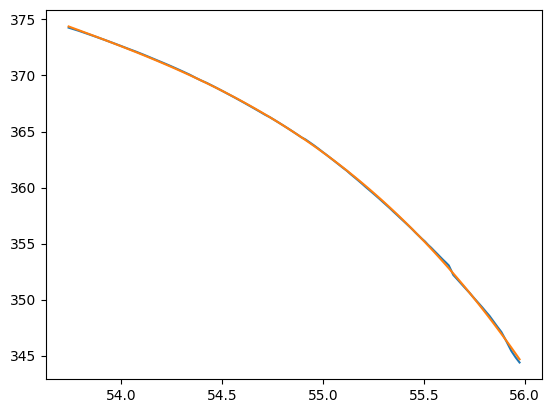

sep borders 0.0 1.0
q_star [0.77831628 0.77840887 0.77589916 0.77528774 0.77421294 0.77270617]
n0_star borders 0.0 5.0
Diff Rho: 0.0004832791830082297
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.00048641729398534486
sep borders 0.0 1.0
q_star [0.5        0.6985073  0.70195421 0.70387439 0.70495697 0.70616205]
n0_star borders 0.0 5.0
Diff Rho: 0.0004917780823204871
sep borders 0.0 1.0
q_star [0.71767155 0.7317993  0.71684698 0.7135466  0.71169456 0.7098413 ]
n0_star borders 0.0 5.0
Diff Rho: 0.00048756856895300566
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0004714818269499185
sep borders 0.0 1.0
q_star [0.9900764  0.99205826 0.99404177 0.99602648 0.99801259 1.        ]
n0_star borders 0.0 5.0
Diff Rho: 0.00046359585172558055
sep borders 0.0 1.0
q_star [0.98977767 0.99182007 0.99386353 0.99590801 0.9979535  1.        ]
n0_star 

c:\Programs\Python 3.11\Lib\site-packages\scipy\interpolate\_fitpack_py.py:290: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


sep borders 0.0 1.0
q_star [0.82437304 0.82542905 0.82565284 0.82564245 0.82533896 0.82468026]
n0_star borders 0.0 5.0
Diff Rho: 0.0005567184515302063
sep borders 0.0 1.0
q_star [0.8387447  0.84042443 0.84152648 0.84237432 0.84287712 0.84290191]
n0_star borders 0.0 5.0
Diff Rho: 0.0005490674013108489
Errors: 1.5249602617818145e-05 2.1139440842368767e-07 1
sep borders 0.0 1.0
q_star [0.5 0.6 0.7 0.8 0.9 1. ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005496453889696258
sep borders 0.0 1.0
q_star [0.79350181 0.79314132 0.79307807 0.79345052 0.79393941 0.79470564]
n0_star borders 0.0 5.0
Diff Rho: 0.0005715248127586575
sep borders 0.0 1.0
q_star [0.5 0.6 0.7 0.8 0.9 1. ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005441979732163295
sep borders 0.0 1.0
q_star [0.61972986 0.6199898  0.61996242 0.61943678 0.61759557 0.61289499]
n0_star borders 0.0 5.0
Diff Rho: 0.0005424834833288596
sep borders 0.0 1.0
q_star [0.98957958 0.99168797 0.99379088 0.99588156 0.99796454 1.        ]
n0_star borders 0.0 5.0
Dif

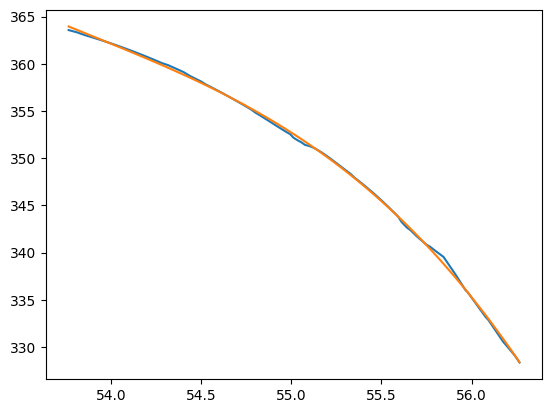

sep borders 0.0 1.0
q_star [0.6050183  0.60493409 0.60485458 0.60480043 0.60474841 0.60469722]
n0_star borders 0.0 5.0
Diff Rho: 0.00047024822764813476
sep borders 0.0 1.0
q_star [0.60613598 0.60610565 0.60607559 0.60604627 0.6060174  0.60598808]
n0_star borders 0.0 5.0
Diff Rho: 0.0004734225716847887
sep borders 0.0 1.0
q_star [0.6183113  0.61889578 0.6192872  0.61938077 0.61898124 0.61773766]
n0_star borders 0.0 5.0
Diff Rho: 0.0004716883341801819
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.00046951413928506957
sep borders 0.0 1.0
q_star [0.60199925 0.60207635 0.60215375 0.60223149 0.60230951 0.60238799]
n0_star borders 0.0 5.0
Diff Rho: 0.00047562189329720055
sep borders 0.0 1.0
q_star [0.60120928 0.60120932 0.60120924 0.60120905 0.60120872 0.60120835]
n0_star borders 0.0 5.0
Diff Rho: 0.00047532758653106265
sep borders 0.0 1.0
q_star [0.60425517 0.60424928 0.60424324 0.60423706 0.60423073 0.60422429]
n

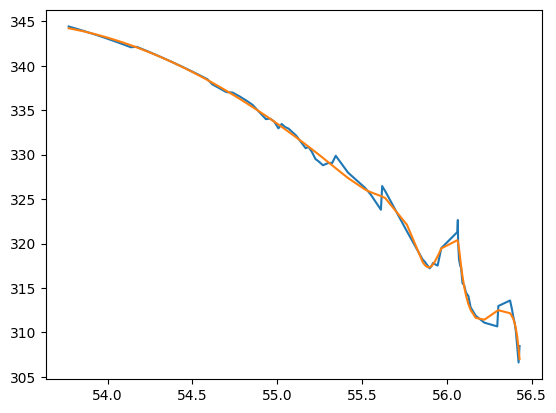

sep borders 0.0 1.0
q_star [0.71209315 0.70155864 0.70043524 0.70076068 0.7015466  0.7027001 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005410954581467572
sep borders 0.0 1.0
q_star [0.7758662  0.77851894 0.77879231 0.76487545 0.76117405 0.75995836]
n0_star borders 0.0 5.0
Diff Rho: 0.0005246966338280093
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005749762541815452
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005630572030321275
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.0005387256810695706
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff Rho: 0.000516146330053692
sep borders 0.0 1.0
q_star [0.5       0.5009901 0.5019802 0.5029703 0.5039604 0.5049505]
n0_star borders 0.0 5.0
Diff R

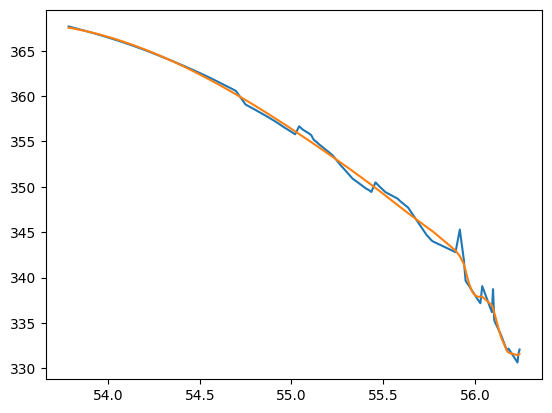

sep borders 0.0 1.0
q_star [0.78211547 0.78327147 0.78447176 0.78570907 0.78697742 0.78826799]
n0_star borders 0.0 5.0
Diff Rho: 0.0005381942228165922
sep borders 0.0 1.0
q_star [0.78386525 0.78492127 0.7860338  0.7871776  0.78831416 0.78949032]
n0_star borders 0.0 5.0
Diff Rho: 0.0005419655089551995
sep borders 0.0 1.0
q_star [0.89384297 0.892894   0.89191547 0.89093    0.88996591 0.8889898 ]
n0_star borders 0.0 5.0
Diff Rho: 0.0005361860492572041
sep borders 0.0 1.0
q_star [0.94640748 0.94821776 0.95002937 0.95184235 0.95179154 0.95117149]
n0_star borders 0.0 5.0
Diff Rho: 0.0005202966916132144
sep borders 0.0 1.0
q_star [0.88499285 0.88625803 0.88760847 0.88902336 0.8904392  0.89188759]
n0_star borders 0.0 5.0
Diff Rho: 0.0005244601204877813
sep borders 0.0 1.0
q_star [0.88087772 0.88253224 0.88419642 0.8858689  0.88754874 0.88923476]
n0_star borders 0.0 5.0
Diff Rho: 0.000524115142577185
sep borders 0.0 1.0
q_star [0.88024689 0.88194617 0.88365046 0.88535894 0.88707095 0.88878599]


In [10]:
from Multiworker_Contract_Spline import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc_Rho,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep(s=10.0)

In [14]:
mwc_Wstar[p.z_0-1,1,1,:,5]

array([53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.58809097,
       53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.58809097,
       53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.58809097,
       53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.58809097,
       53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.58809097,
       53.58809097, 53.58809097, 53.58809097, 53.58809097, 53.91738435,
       53.93216775, 53.94694262, 53.96144011, 53.97564741, 53.98930738,
       54.00244362, 54.01514175, 54.02830305, 54.04066501, 54.05362132,
       54.06624592, 54.07886712, 54.0913408 , 54.10389791, 54.11653315,
       54.12937049, 54.14140926, 54.15334431, 54.16515598, 54.17673103,
       54.18802654, 54.19936188, 54.21084249, 54.22261316, 54.23676506,
       54.26326681, 54.27638527, 54.28806624, 54.28806842, 54.28877829,
       54.30391837, 54.31872164, 54.33609131, 54.35222353, 54.37776521,
       54.39615252, 54.40529791, 54.41327367, 54.42478861, 54.44

In [15]:
mwc.v_grid[-1]

62.06177399671717

In [12]:
mwc_J[p.z_0-1,1,1,:,:]

array([[503.55956559, 503.047362  , 500.46953536, 501.62604218,
        505.36852518, 514.02728496],
       [503.39271604, 502.88051246, 500.30268581, 501.45919263,
        505.20167563, 513.86043542],
       [503.22586649, 502.71366291, 500.13583626, 501.29234309,
        505.03482609, 513.69358587],
       [503.05901695, 502.54681336, 499.96898672, 501.12549354,
        504.86797654, 513.52673633],
       [502.8921674 , 502.37996382, 499.80213717, 500.95864399,
        504.701127  , 513.35988678],
       [502.72531786, 502.21311427, 499.63528762, 500.79179445,
        504.53427745, 513.19303723],
       [502.55846831, 502.04626473, 499.46843808, 500.6249449 ,
        504.3674279 , 513.02618769],
       [502.39161876, 501.87941518, 499.30158853, 500.45809536,
        504.20057836, 512.85933814],
       [502.22476922, 501.71256563, 499.13473899, 500.29124581,
        504.03372881, 512.69248859],
       [502.05791967, 501.54571609, 498.96788944, 500.12439626,
        503.86687927, 512.5

In [11]:
objects['mwc_J'] = mwc_J
objects['mwc_W'] = mwc_W
objects['mwc_U'] = mwc_U
objects['mwc_Rho'] = mwc_Rho

In [ ]:
mwc_Rho_J = results['J']
mwc_Rho_W = results['W']
mwc_Rho_U = results['U']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
mwc_Rho_Rho = results['Rho']


from Multiworker_Contract_Tasmanian_light import MultiworkerContract
mwc = MultiworkerContract(6, p, cc.js)
(mwc_J,mwc_W,mwc_U,mwc,mwc_Wstar,mwc_sep,mwc_n0,mwc_n1)=mwc.J_sep()

In [4]:
mwc_Rho_J = objects['mwc_Rho_J']
mwc_Rho_W = objects['mwc_Rho_W']

In [ ]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)
(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U,mwc_Rho_Rho,mwc_Rho_Wstar,mwc_Rho_sep,mwc_Rho_n0,mwc_Rho_n1)=mwc_Rho.J_sep(mwc_Rho_J,mwc_Rho_W,mwc_Rho_U)

In [7]:
objects['mwc_Rho_J'] = mwc_Rho_J
objects['mwc_Rho_W'] = mwc_Rho_W
objects['mwc_Rho_U'] = mwc_Rho_U
objects['mwc_Rho_Rho'] = mwc_Rho_Rho

In [ ]:

assert np.all(mwc.rho_grid[1:] >= mwc.rho_grid[ :-1])

In [26]:
np.array((mwc.points[:,0],mwc.points[:,1]))

array([[2.    , 2.    , 2.    , ..., 3.6875, 3.8125, 3.9375],
       [2.005 , 2.005 , 2.005 , ..., 2.005 , 2.005 , 2.005 ]])

In [29]:
# Exclude the 3rd dimension (index 2)
points_reduced = np.delete(mwc.points, 2, axis=1)

# Find unique combinations
unique_combinations = np.unique(points_reduced, axis=0)

print("Unique combinations of (a, b, d):")
print(unique_combinations)

Unique combinations of (a, b, d):
[[0.      0.01    0.5    ]
 [0.      0.01    0.53125]
 [0.      0.01    0.5625 ]
 ...
 [4.      4.      0.9375 ]
 [4.      4.      0.96875]
 [4.      4.      1.     ]]


In [30]:
unique_combinations.shape

(1073, 3)

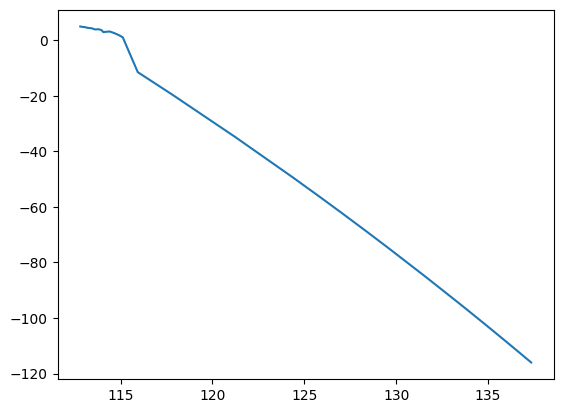

In [29]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

In [5]:
from ContinuousContract import ContinuousContract
cc=ContinuousContract(p)

115.11807503732125


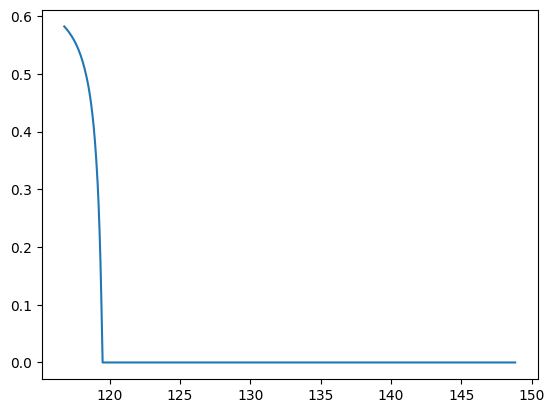

In [6]:
(cc_J,cc_W,cc_Wstar,cc_Jpi,cc_pc)=cc.J(1)

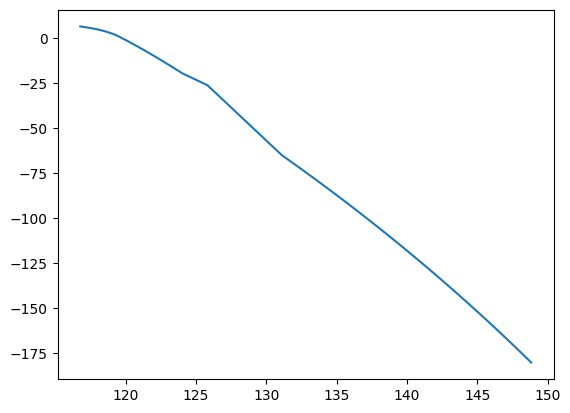

In [8]:
plt.plot(cc_W[p.z_0-1,:],cc_J[p.z_0-1,:])
#plt.plot(cc_W[p.z_0-1,:],cc_Jpi[p.z_0-1,:])

Tring to apply Tasmanian to the already evaluated J using interpolations.
Note: in the ideal Tasmanian scenario, I would instead directly evaluate J at the points suggested by Tasmanian! This would be essentially an endogenous grid method

In [5]:
# Load the temp objects
try:
    with open('my_objects.pkl', 'rb') as file:
        objects = pickle.load(file)
except FileNotFoundError:
    # If the file doesn't exist, start with an empty dictionary
    objects = {}

# Load the permanent results, for sep, across different parametrizations
with open("results_Rho_sep.pkl", "rb") as file:
    all_results = pickle.load(file)
results = get_results_for_p(p,all_results)

(3, 200, 5, 4, 1, 1.0, 1.0, 1.0, 0.85, 0.25, 1.0)


In [8]:
from Multiworker_Contract_hire_Rho_noapprox import MultiworkerContract
mwc_Rho=MultiworkerContract(p,cc.js)

In [71]:
from scipy.interpolate import RegularGridInterpolator

vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid, mwc_Rho.Q_grid), J, bounds_error=False, fill_value=None) (po) for po in points])


In [57]:
dim = 1
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja")

points = grid[1].getPoints()

In [59]:
sorted_indices = np.argsort(points[:, 0])  # for a 1D example
points_sorted = points[sorted_indices]
values_sorted = original_values[sorted_indices]


In [63]:
sorted_indices[25]

0

In [64]:
inverse_indices[sorted_indices]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [60]:
# Create an inverse mapping from sorted indices back to original
inverse_indices = np.zeros_like(sorted_indices)
inverse_indices[sorted_indices] = np.arange(len(sorted_indices))

# Use inverse_indices to rearrange the updated values back to the original order
updated_values = updated_values_sorted[inverse_indices]


NameError: name 'updated_values_sorted' is not defined

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import RegularGridInterpolator

J = objects['mwc_Rho_J']
W = objects['mwc_Rho_W']

J = J[p.z_0-1,...,0]

# Create a global sparse grid
dim = 3
outputs = 1
depth = 25
anisotropic_weights = [1, 1, 2]  # for example, give dimension 3 more weight. Use this to make the foc make sense in high dimensions!

grid = {}
grid[1] = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid[1].makeGlobalGrid(dim, outputs, depth, "level", "rleja", anisotropic_weights)
#Good methods: "clenshaw-curtis", rleja" maybe?, "gauss-patterson" kinda overdoes it, "leja" is good but requires higher depth (like 10)... still not many points though!


a = (mwc_Rho.N_grid[0]+1e-10,mwc_Rho.N_grid1[0]+1e-10,mwc_Rho.rho_grid[0]+1e-10)
b = (mwc_Rho.N_grid[-1]-1e-10,mwc_Rho.N_grid1[-1]-1e-10,mwc_Rho.rho_grid[-1]-1e-10)
grid[1].setDomainTransform(np.column_stack((a, b)))
# Get the points where Tasmanian wants J evaluated
points = grid[1].getPoints()  # shape = (N,4)
print ("Number of points", points.shape[0])

# Evaluate J at these points (our "given" data)
vals = np.array([RegularGridInterpolator((mwc_Rho.N_grid, mwc_Rho.N_grid1, mwc_Rho.rho_grid), J, bounds_error=False, fill_value=None) (po) for po in points])

# Load these values into the Tasmanian grid
grid[1].loadNeededPoints(vals)

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
j= 0
s= 1
fixed_x0 = mwc_Rho.N_grid[j]
fixed_x1 = mwc_Rho.N_grid1[s]


# Create a range of points along x_2
x2_values = mwc_Rho.rho_grid[1:-2]
plot_points = np.zeros((197,3))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values


# Evaluate original function J at these slice points
original_values = np.array([J[j,s,1:-2]])[0,:]

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid[1].evaluateBatch(plot_points)[:,0]

Number of points 1729


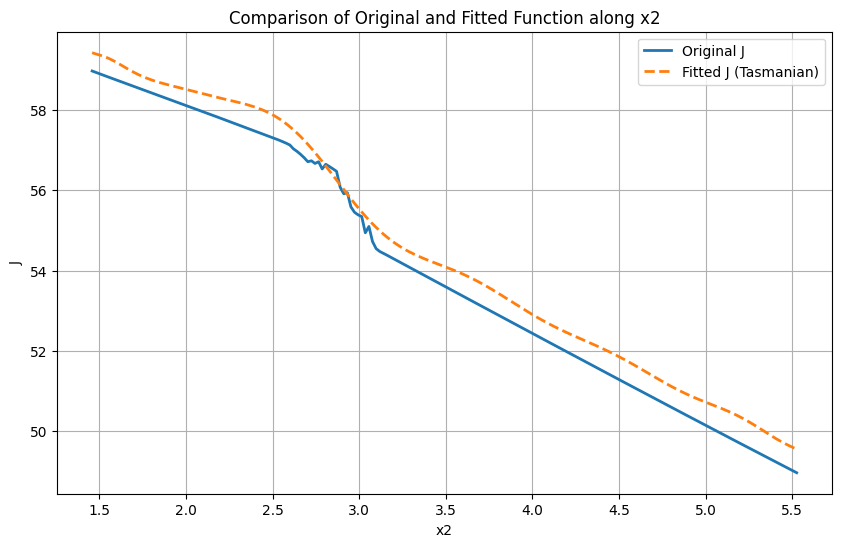

In [21]:
# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
j=0
s=0
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

tas_derivatives = []
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] #Derivative around coordinate 1
    tas_derivatives.append(dJdx1)

NameError: name 'deriv_points' is not defined

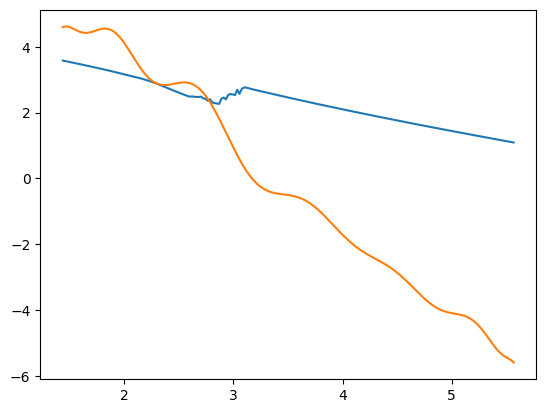

In [32]:
plt.plot(mwc_Rho.rho_grid,(J[j,3,:]-J[j,1,:])/2)
plt.plot(mwc_Rho.rho_grid,tas_derivatives)

In [30]:
#Getting derivatives around the original J values
# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = mwc_Rho.rho_grid# some test points for derivative

deriv_points = np.zeros((mwc_Rho.rho_grid.shape[0],3))
j=2
s=2
v=100
deriv_points[:,0] = mwc_Rho.N_grid[j]
deriv_points[:,1] = mwc_Rho.N_grid1[s]  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = test_points   # fix other dimensions

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += 1
    x_backward[dim] -= 1
    return (f[x_forward] - f[x_backward]) / (2)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J[j,:,v], pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference: {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


IndexError: arrays used as indices must be of integer (or boolean) type

Basic example

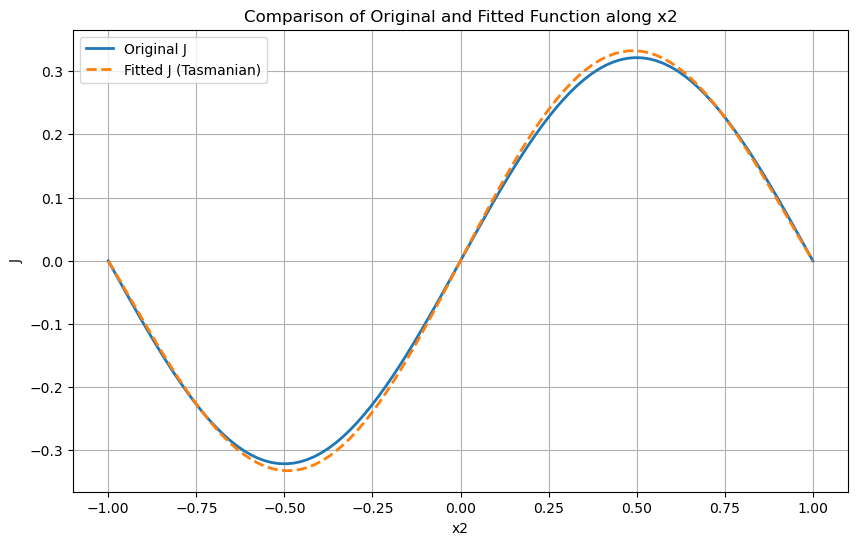

Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) 
---------------------------------------------------------------------
-0.800	+0.15936975	+0.20301242	+0.15574745
-0.720	+0.16197897	+0.22877791	+0.15778802
-0.640	+0.16053042	+0.24418361	+0.15592613
-0.560	+0.15461715	+0.24837205	+0.14979996
-0.480	+0.14402709	+0.24093288	+0.13923148
-0.400	+0.12877669	+0.22201060	+0.12425586
-0.320	+0.10912961	+0.19234678	+0.10513712
-0.240	+0.08559734	+0.15326637	+0.08236740
-0.160	+0.05892050	+0.10661701	+0.05664885
-0.080	+0.03003135	+0.05467114	+0.02885873
+0.000	+0.00000000	+0.00000000	+0.00000000
+0.080	-0.03003135	-0.05467114	-0.02885873
+0.160	-0.05892050	-0.10661701	-0.05664885
+0.240	-0.08559734	-0.15326637	-0.08236740
+0.320	-0.10912961	-0.19234678	-0.10513712
+0.400	-0.12877669	-0.22201060	-0.12425586
+0.480	-0.14402709	-0.24093288	-0.13923148
+0.560	-0.15461715	-0.24837205	-0.14979996
+0.640	-0.16053042	-0.24418361	-0.15592613
+0.720	-0.16197897	-0.22877791	-0.15778802

In [89]:
import numpy as np
import Tasmanian
import matplotlib.pyplot as plt
import time

# Define the 5D test function J
# J(x0,x1,x2,x3,x4) = exp(-x0^2 - x1^2)* sin(pi*x2)* cos(pi*x3) * (1 + x4^2)
def J(x):
    return (np.exp(-x[0]**2 - x[1]**2) 
            * np.sin(np.pi*x[2]) 
            * np.cos(np.pi*x[3]) 
            * (1.0 + x[4]**2))

# Let's pick which dimension to slice and which to differentiate:
# - We'll plot along x_2 (dimension=2), fixing x_0,x_1,x_3,x_4.
# - We'll differentiate along x_1 (dimension=1).

# Create a global sparse grid
dim = 5
outputs = 1
depth = 5
grid = Tasmanian.TasmanianSparseGrid()
# Using a global polynomial rule for demonstration:
grid.makeGlobalGrid(dim, outputs, depth, "level", "clenshaw-curtis")

# Get the points where Tasmanian wants J evaluated
points = grid.getPoints()  # shape = (N,5)

# Evaluate J at these points (our "given" data)
vals = np.array([[J(p)] for p in points])

# Load these values into the Tasmanian grid
grid.loadNeededPoints(vals)

# Now we have a fitted surrogate model using Tasmanian.

# 1. Plotting along dimension 2:
# Fix other dimensions, say x0=0.0, x1=0.0, x3=0.5, x4=-0.2
fixed_x0 = 0.0
fixed_x1 = 0.0
fixed_x3 = 0.4
fixed_x4 = -0.2

# Create a range of points along x_2
x2_values = np.linspace(-1, 1, 100)
plot_points = np.zeros((100,5))
plot_points[:,0] = fixed_x0
plot_points[:,1] = fixed_x1
plot_points[:,2] = x2_values
plot_points[:,3] = fixed_x3
plot_points[:,4] = fixed_x4

# Evaluate original function J at these slice points
original_values = np.array([J(pt) for pt in plot_points])

# Evaluate the Tasmanian surrogate at these slice points
fitted_values = grid.evaluateBatch(plot_points)[:,0]

# Plot the original vs fitted
plt.figure(figsize=(10,6))
plt.plot(x2_values, original_values, label='Original J', linewidth=2)
plt.plot(x2_values, fitted_values, label='Fitted J (Tasmanian)', linestyle='--', linewidth=2)
plt.xlabel('x2')
plt.ylabel('J')
plt.title('Comparison of Original and Fitted Function along x2')
plt.legend()
plt.grid(True)
plt.show()

# 2. Compute derivatives along dimension 1 (the second coordinate x_1):
# We can use Tasmanian's differentiate for a set of test points.
test_points = np.linspace(-0.8, 0.8, 21) # some test points for derivative
deriv_points = np.zeros((21,5))
deriv_points[:,0] = fixed_x0
deriv_points[:,1] = test_points  # We'll differentiate w.r.t. this dimension (x1)
deriv_points[:,2] = 0.2   # fix other dimensions
deriv_points[:,3] = fixed_x3
deriv_points[:,4] = fixed_x4

# Tasmanian derivative w.r.t. dimension 1:
# differentiate() returns the full Jacobian (for all outputs and all dims), 
# we need the correct index.
tas_derivatives = []
start_tas = time.perf_counter()
for pt in deriv_points:
    jac = grid.differentiate(pt)  # returns flat array of length outputs*dimensions
    # We want the derivative w.r.t x_1, which is dimension=1 (0-based)
    # For a single output: jac = [dJ/dx0, dJ/dx1, dJ/dx2, dJ/dx3, dJ/dx4]
    dJdx1 = jac[1] 
    tas_derivatives.append(dJdx1)
end_tas = time.perf_counter()
tas_time = end_tas - start_tas
tas_derivatives = np.array(tas_derivatives)

# 3. Finite difference approximation of the derivative w.r.t x_1:
def finite_diff_derivative(f, x, dim=1, h=1e-5):
    # f is J, x is point, dim is the dimension we differentiate along
    # We'll do a central difference: (f(x+h) - f(x-h)) / (2*h)
    x_forward = np.copy(x)
    x_backward = np.copy(x)
    x_forward[dim] += h
    x_backward[dim] -= h
    return (f(x_forward) - f(x_backward)) / (2.0*h)

# Compare the fitted derivative from Tasmanian with a finite difference approximation.
# We'll do finite difference using:
#   a) The original function J (for a reference "truth")
#   b) The fitted approximation (to see if FD on the surrogate matches its differentiate())

fd_original = []
start_fd_orig = time.perf_counter()
for pt in deriv_points:
    fd_original.append(finite_diff_derivative(J, pt, dim=1))
end_fd_orig = time.perf_counter()
fd_orig_time = end_fd_orig - start_fd_orig
fd_original = np.array(fd_original)

fd_fitted = []
start_fd_fitted = time.perf_counter()
for pt in deriv_points:
    # Using the fitted surrogate:
    fd_fitted.append(finite_diff_derivative(J, pt, dim=1,h=2e-1))
end_fd_fitted = time.perf_counter()
fd_fitted_time = end_fd_fitted - start_fd_fitted
fd_fitted = np.array(fd_fitted)

# Print comparison:
print("Point (x1) |  Exact FD(Original)  | Tasmanian Derivative | FD(Fitted) ")
print("---------------------------------------------------------------------")
for x1_val, fd_orig_val, tas_val, fd_fit_val in zip(test_points, fd_original, tas_derivatives, fd_fitted):
    print(f"{x1_val:+1.3f}\t{fd_orig_val:+1.8f}\t{tas_val:+1.8f}\t{fd_fit_val:+1.8f}")

# Print timing info
print("\nTiming Information:")
print(f"Tasmanian differentiate: {tas_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (original): {fd_orig_time:.6f} seconds for {len(test_points)} points")
print(f"Finite difference (fitted): {fd_fitted_time:.6f} seconds for {len(test_points)} points")

# The above results will show:
# - How Tasmanian's built-in derivative compares to a FD approximation of the original.
# - How FD on the fitted surrogate compares.
# - The relative speeds of Tasmanian differentiation vs finite differences.


Testing derivative speed: Tasmanian vs Finite Diff

In [77]:
import numpy as np
import Tasmanian

def f(x):
    # f(x) = sin(x)*exp(-x^2)
    return np.sin(x[0]) * np.exp(-x[0]**2)

def fprime(x):
    # f'(x) = cos(x)*exp(-x^2) - 2x*sin(x)*exp(-x^2)
    return (np.cos(x[0])*np.exp(-x[0]**2)) - (2*x[0]*np.sin(x[0])*np.exp(-x[0]**2))

# Create a global sparse grid
grid = Tasmanian.TasmanianSparseGrid()
grid.makeGlobalGrid(1, 1, 5, "level", "gauss-legendre")

# Get the points and load function values
interp_points = grid.getPoints()
vals = np.array([[f(pt)] for pt in interp_points])
grid.loadNeededPoints(vals)

# Points at which to differentiate
test_points = np.linspace(-1.0, 1.0, 11).reshape((11, 1))

approx_derivatives = []
for p in test_points:
    # Ensure p is passed as a simple list/array of floats
    x_list = p[0]  # Convert to a simple Python list with one element
    jac = grid.differentiate(x_list)
    # If jac is scalar, just append jac directly
    # If it's an array, you'd do jac[0], but likely it's scalar
    approx_derivatives.append(jac)

approx_derivatives = np.array(approx_derivatives)

exact_derivatives = np.array([fprime(p) for p in test_points])

print("x\t\tExact Derivative\tApprox Derivative\tError")
print("-------------------------------------------------------------")
for i, p in enumerate(test_points):
    approx = approx_derivatives[i]
    exact = exact_derivatives[i]
    error = abs(exact - approx)/abs(exact)
    print(f"{p[0]:+1.4f}\t{exact:+1.8f}\t{approx:+1.8f}\t{error:+1.8f}")


x		Exact Derivative	Approx Derivative	Error
-------------------------------------------------------------
-1.0000	-0.42035364	-0.22111074	+0.47398875
-0.8000	-0.23784212	-0.25215458	+0.06017632
-0.6000	+0.10309190	+0.08867878	+0.13980841
-0.4000	+0.51940407	+0.52765542	+0.01588620
-0.2000	+0.86528586	+0.86925111	+0.00458258
+0.0000	+1.00000000	+0.99615128	+0.00384872
+0.2000	+0.86528586	+0.86925111	+0.00458258
+0.4000	+0.51940407	+0.52765542	+0.01588620
+0.6000	+0.10309190	+0.08867878	+0.13980841
+0.8000	-0.23784212	-0.25215458	+0.06017632
+1.0000	-0.42035364	-0.22111074	+0.47398875


## Older stuff: Spline fitting

In [ ]:
from scipy.interpolate import UnivariateSpline

# Spline Fitting
def fit_spline(W, J1, smoothness=0):
    """
    Fit a Univariate Spline to the data.

    Parameters:
    - W: Input grid points.
    - J1: Observed values at grid points.
    - smoothness: Smoothing factor. Larger values result in smoother fits.
      Default of 0 results in an interpolating spline.

    Returns:
    - spline: Fitted spline object.
    """
    spline = UnivariateSpline(W, J1, s=smoothness)
    return spline

# Fit the spline (adjust smoothness if needed)
smoothness_factor = 0.1  # Adjust this based on your needs
spline = fit_spline(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], smoothness=smoothness_factor)

In [ ]:
# Evaluate the spline over a fine grid
W_fine = np.linspace(mwc_Rho_W[2,2,2,:,0,1].min(), mwc_Rho_W[2,2,2,:,0,1].max(), 500)
J1_spline = spline(W_fine)

# Plot the Results
plt.figure(figsize=(8, 5))
plt.scatter(mwc_Rho_W[2,2,2,:,0,1], mwc_Rho_J[2,2,2,:,0], label="Observed Data", color="blue", alpha=0.7)
#plt.plot(W_fine, true_function, label="True Function (Ground Truth)", color="green", linestyle="--")
plt.plot(W_fine, J1_spline, label="Spline Approximation", color="red")
plt.xlabel("W")
plt.ylabel("J1")
plt.title("Spline Fitting to Capture Concavity")
plt.legend()
plt.show()

# Access Spline Derivatives
first_derivative = spline.derivative(n=1)(W_fine)  # First derivative
delta_second_derivative = spline.derivative(n=2)(W_fine)  # Second derivative